In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

df = pd.read_csv(r"C:\Users\goder\Downloads\job_dataset.csv")
df.head()

,JobID,Title,ExperienceLevel,YearsOfExperience,Skills,Responsibilities,Keywords
0,NET-F-001,.NET Developer,Fresher,0-1,C#; VB.NET basics; .NET Framework; .NET Core f...,Assist in coding and debugging applications; L...,.NET; C#; ASP.NET MVC; Entity Framework; SQL S...
1,NET-F-002,.NET Developer,Fresher,0-1,C#; .NET Framework basics; ASP.NET; Razor; HTM...,Write simple C# programs under guidance; Suppo...,.NET; C#; ASP.NET MVC; Entity Framework; SQL S...
2,NET-F-003,.NET Developer,Fresher,0-1,C#; VB.NET basics; .NET Core; ASP.NET MVC; HTM...,Contribute to development of small modules; As...,.NET; C#; ASP.NET MVC; SQL Server; Entity Fram...
3,NET-F-004,.NET Developer,Fresher,0-1,C#; .NET Framework; ASP.NET basics; SQL Server...,Support in software design documentation; Assi...,.NET; C#; SQL Server; Entity Framework; ASP.NET
4,NET-F-005,.NET Developer,Fresher,0-1,C#; ASP.NET; MVC; Entity Framework basics; SQL...,Learn to design and build ASP.NET applications...,.NET; C#; ASP.NET MVC; Entity Framework; SQL S...


In [2]:
df = df.dropna(subset=["Title"])

In [3]:
df.isnull().sum()

JobID                0
Title                0
ExperienceLevel      0
YearsOfExperience    0
Skills               0
Responsibilities     0
Keywords             0
dtype: int64

In [5]:
df = df.dropna(subset=["Title"]).reset_index(drop=True)

In [9]:
df.head()

,JobID,Title,ExperienceLevel,YearsOfExperience,Skills,Responsibilities,Keywords
0,NET-F-001,.NET Developer,Fresher,0-1,C#; VB.NET basics; .NET Framework; .NET Core f...,Assist in coding and debugging applications; L...,.NET; C#; ASP.NET MVC; Entity Framework; SQL S...
1,NET-F-002,.NET Developer,Fresher,0-1,C#; .NET Framework basics; ASP.NET; Razor; HTM...,Write simple C# programs under guidance; Suppo...,.NET; C#; ASP.NET MVC; Entity Framework; SQL S...
2,NET-F-003,.NET Developer,Fresher,0-1,C#; VB.NET basics; .NET Core; ASP.NET MVC; HTM...,Contribute to development of small modules; As...,.NET; C#; ASP.NET MVC; SQL Server; Entity Fram...
3,NET-F-004,.NET Developer,Fresher,0-1,C#; .NET Framework; ASP.NET basics; SQL Server...,Support in software design documentation; Assi...,.NET; C#; SQL Server; Entity Framework; ASP.NET
4,NET-F-005,.NET Developer,Fresher,0-1,C#; ASP.NET; MVC; Entity Framework basics; SQL...,Learn to design and build ASP.NET applications...,.NET; C#; ASP.NET MVC; Entity Framework; SQL S...


In [11]:
df["combined_text"] = (df["Skills"]+" "+df["Responsibilities"]+" "+df["Keywords"])

In [13]:
df["combined_text"].head()

0    C#; VB.NET basics; .NET Framework; .NET Core f...
1    C#; .NET Framework basics; ASP.NET; Razor; HTM...
2    C#; VB.NET basics; .NET Core; ASP.NET MVC; HTM...
3    C#; .NET Framework; ASP.NET basics; SQL Server...
4    C#; ASP.NET; MVC; Entity Framework basics; SQL...
Name: combined_text, dtype: object

In [15]:
X_text = df["combined_text"]
y = df["Title"]

In [39]:
#from sklearn.feature_extraction.text import TfidfVectorizer edi already import chasam kada
vectorizer = TfidfVectorizer(max_features=8000,
                             ngram_range=(1,2),
                             stop_words='english',
                             lowercase=True)
X = vectorizer.fit_transform(X_text)

In [41]:
print(X.shape)

(1067, 8000)


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [45]:
#from sklearn.svm import LinearSVC we already import this
model = LinearSVC(dual="auto")
model.fit(X_train, y_train)

LinearSVC(dual='auto')

In [47]:
#from sklearn.metrics import accuracy_score we already import this also
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7850467289719626


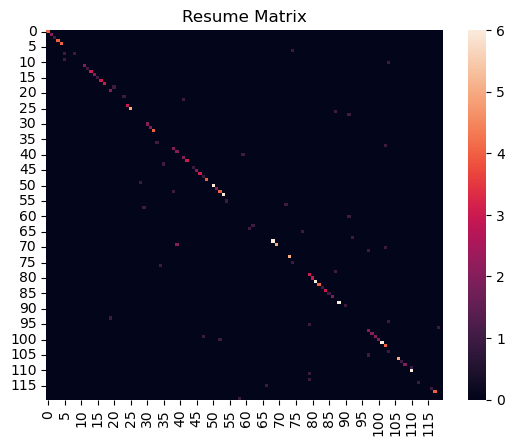

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=False)
plt.title("Resume Matrix")
plt.show()

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                                          precision    recall  f1-score   support

                          .NET Developer       1.00      1.00      1.00         4
               AI Engineer - Experienced       1.00      1.00      1.00         2
                   AI Engineer - Fresher       1.00      1.00      1.00         1
                      AI Prompt Engineer       1.00      1.00      1.00         4
                         AR/VR Developer       1.00      1.00      1.00         4
           Android App Developer Trainee       0.00      0.00      0.00         0
                       Android Architect       0.00      0.00      0.00         1
                Android Developer Intern       0.00      0.00      0.00         2
               Android Developer Trainee       0.00      0.00      0.00         0
              Android Development Intern       0.00      0.00      0.00         1
               Associate System Engineer       0.00      0.00      0.00         1
               

C:\Users\goder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goder\anaconda3\Lib\site-packages\sklea

In [62]:
import joblib
import joblib

joblib.dump(model, r"C:\Users\goder\OneDrive\Desktop\resume_analyser\job_role_model.pkl")
joblib.dump(vectorizer, r"C:\Users\goder\OneDrive\Desktop\resume_analyser\vectorizer.pkl")

print("Model saved successfully in resume_analyser folder")

Model saved successfully in resume_analyser folder
